In [1]:
%cd /media/Shared/Autonomous-Navigation-Offroad-by-traversability-analysis/src

/media/Shared/Autonomous-Navigation-Offroad-by-traversability-analysis/src


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

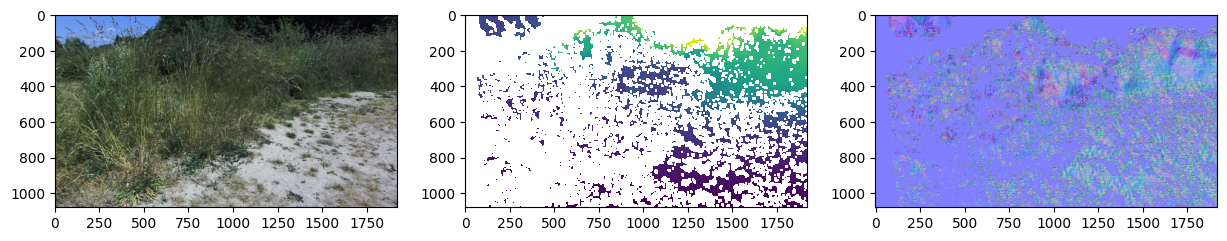

In [3]:
id = np.random.randint(1, 10)
# id = 6
dir = "../bagfiles/images_extracted/"
img, depth, norm = (Image.open(dir+f"{id}.png"), Image.open(dir+f"{id}d.png"), Image.open(dir+f"{id}n.png"))
img, depth, norm = np.array(img)/255, np.array(depth)/255, np.array(norm)/255

# Mask everything by valid depth
depth = np.where(depth>0, depth, np.nan)

fig, (a1, a2, a3) = plt.subplots(1, 3, figsize = (15, 45))
# plt.axis("off")
a1.imshow(img)
a2.imshow(depth)
a3.imshow(norm)

In [4]:
!pwd

/media/Shared/Autonomous-Navigation-Offroad-by-traversability-analysis/src


In [5]:
import params.params.robot

In [6]:
K = params.params.robot.K

K

array([[1067,    0,  943],
       [   0, 1067,  521],
       [   0,    0,    1]])

In [7]:
fx, fy, cx, cy = K[0,0], K[1, 1], K[0, 2], K[1, 2]

fx, fy, cx, cy

(1067, 1067, 943, 521)

In [8]:
valid = (depth>=0) & (depth<1)
np.unique(valid)

array([False,  True])

In [9]:
z = np.where(valid, depth, np.nan)
np.unique(np.unique(z)-np.unique(depth))

array([ 0., nan])

In [10]:
from obstacle_detection.pointcloud import depthimage_to_pointcloud, depth_to_pointcloud, visualise_pointcloud, visualise_pointcloud_plotly

pc = depth_to_pointcloud(depth, K)

pc.shape

(1080, 1920, 3)

In [11]:
pc = pc[~np.isnan(depth)]

In [12]:
pc.shape

(1265064, 3)

In [14]:
img_ = img[~np.isnan(depth)]
img_.shape

(1265064, 3)

In [15]:
idx = np.random.randint(pc.shape[0], size = 10000)
pc_ = pc[idx, :]
img_ = img_[idx, :]
visualise_pointcloud_plotly(pc_, img_)

ValueError: Data must be 1-dimensional, got ndarray of shape (10000, 3) instead

In [ ]:
norm.shape

(1080, 1920, 3)

In [ ]:
from obstacle_detection.normals import cost_from_normals, cosine_similarity


0.6427876096865394


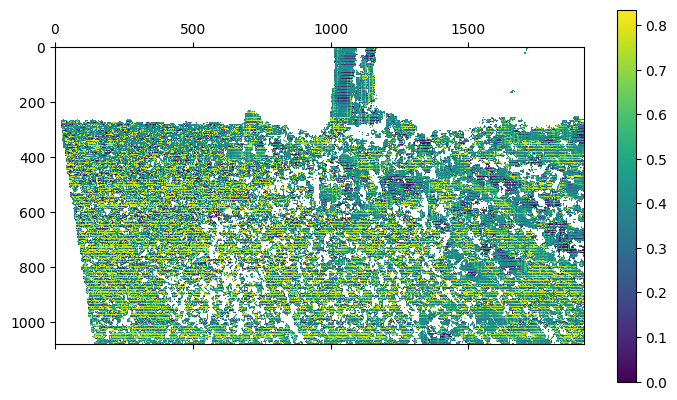

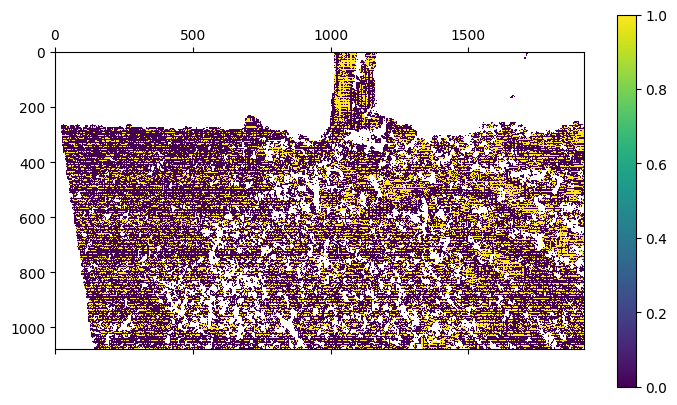

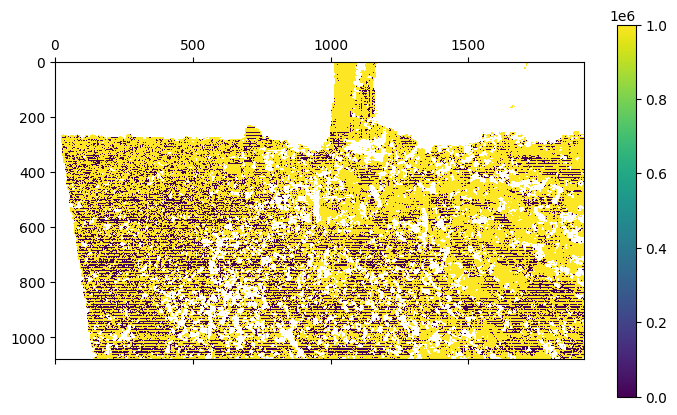

In [ ]:
THRESH = 50
ref = np.array([0, -1, 0])
COS_THRESH = np.cos(THRESH*np.pi/180)
print(COS_THRESH)
sim = cosine_similarity(norm, ref = ref)
plt.matshow(np.where(np.isnan(depth), np.nan, sim))
plt.colorbar()
plt.show()
cost_ = np.where(sim>0.4, 0, 1)
# cost_ = 1 - sim
plt.matshow(np.where(np.isnan(depth), np.nan, cost_))
plt.colorbar()
plt.show()
cost = cost_from_normals(norm, ref,thresh=COS_THRESH)
plt.matshow(np.where(np.isnan(depth), np.nan, cost))
plt.colorbar()
plt.show()

In [ ]:
np.min(sim)

0.0

In [ ]:
np.arccos(np.min(sim))*180/np.pi

90.0

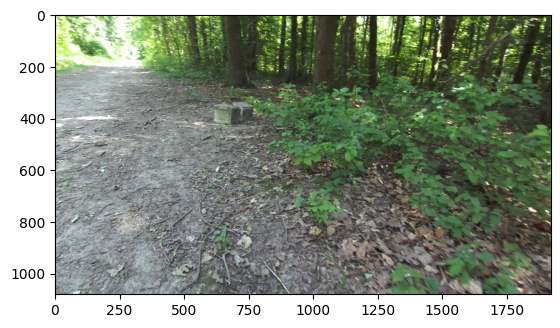

In [ ]:
plt.imshow(img)

In [ ]:
np.unique(depth)

array([0.03137255, 0.03529412, 0.03921569, 0.04313725, 0.04705882,
       0.05098039, 0.05490196, 0.05882353, 0.0627451 , 0.06666667,
       0.07058824, 0.0745098 , 0.07843137, 0.08235294, 0.08627451,
       0.09019608, 0.09411765, 0.09803922, 0.10196078, 0.10588235,
       0.10980392, 0.11372549, 0.11764706, 0.12156863, 0.1254902 ,
       0.12941176, 0.13333333, 0.1372549 , 0.14117647, 0.14509804,
       0.14901961, 0.15294118, 0.15686275, 0.16078431, 0.16470588,
       0.16862745, 0.17254902, 0.17647059, 0.18039216, 0.18431373,
       0.18823529, 0.19215686, 0.19607843, 0.2       , 0.20392157,
       0.20784314, 0.21176471, 0.21568627, 0.21960784, 0.22352941,
       0.22745098, 0.23137255, 0.23529412, 0.23921569, 0.24313725,
       0.24705882, 0.25098039, 0.25490196, 0.25882353, 0.2627451 ,
       0.26666667, 0.27058824, 0.2745098 , 0.27843137, 0.28235294,
       0.28627451, 0.29019608, 0.29411765, 0.29803922, 0.30196078,
       0.30588235, 0.30980392, 0.31372549, 0.31764706, 0.32156

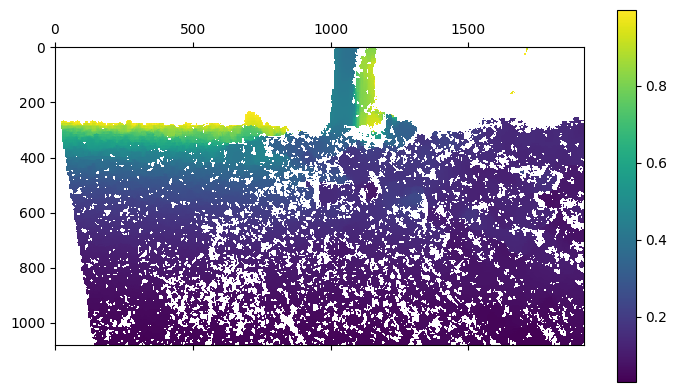

In [ ]:
plt.matshow(depth); plt.colorbar(); plt.show()

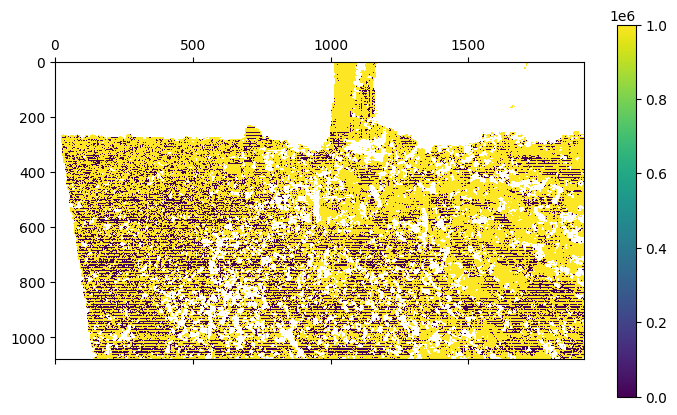

In [ ]:
cost_masked = np.where(depth>0, cost, np.nan)
plt.matshow(cost_masked)
plt.colorbar()
plt.show()

In [ ]:
plt.matshow(np.where(np.isnan(depth), np.nan, norm))

ValueError: operands could not be broadcast together with shapes (1080,1920) () (1080,1920,3) 

In [ ]:
norm.shape, pc.shape

((1080, 1920, 3), (1233002, 3))

In [ ]:
norm_ = norm[~np.isnan(depth)]
norm_.shape

(1233002, 3)

In [ ]:
import plotly.graph_objects as go



fig = go.Figure(data=go.Cone(x=pc_[:1000, 0], 
                             y=pc_[:1000, 1], 
                             z=pc_[:1000, 2], 
                             u=norm_[:1000, 0],
                             v=norm_[:1000, 1], 
                             w=norm_[:1000, 2]))

# fig.update_layout(scene_camera_eye=dict(x=-0.76, y=1.8, z=0.92))

fig.show()

In [ ]:
from pointcloud import RansacSegmentation

seg = RansacSegmentation()

In [ ]:
# Get candidiate normal from ransac

from pointcloud import RansacSegmentation

seg = RansacSegmentation(pc_)